# Credit Card Customer Segmentation


***
Focusing on clustering. the process entails categorizing data points into distinct groups. Unlike supervised learning, where the groups are predetermined, clustering operates on an **unsupervised learning**. The objective of this project is to segment credit card customers into various groups and derive recommendations tailored to each group. 

* Usage of the k-Means algorithm to split data into clusters 
* Utilizing the silhouette method to assess the effectiveness of the clusters
***


**Scenario:** A bank wants to refine the credit card terms and conditions for its customers. The bank aims to gain a deeper understanding of its credit card clients to offer tailored conditions. While data on its credit card holders is available, the specific customer segments remain undiscovered. The task at hand is to explore whether distinct customer groups exist within the credit card base and, if so, recommend which groups should receive improved terms. By identifying these segments, targeted terms and conditions can be proposed that cater to the diverse needs of "good" credit card customers, enhancing their satisfaction and the bank's competitive edge


*data dictionary* 

Column number | Column name       | Type      | Description
---           | ---                 | ---                 | ---
0 | `CUST_ID` | categorical (`int`) | identification number of the credit card holder
1 | `BALANCE` | numeric (`float`) | balance on the account
2 | `PURCHASES` | numeric (`float`) | number of purchases from the account
3 | `PURCHASES_TRX` | numeric (`int`) | number of purchase transactions made
4 | `ONEOFF_PURCHASES` | numeric (`float`) | Maximum purchase amount with one purchase
5 | `CASH_ADVANCE` | numeric (`float`) | prepayment by user
6 | `CASH_ADVANCE_TRX` | numeric (`int`) | number of transactions with prepayment
7 | `CREDIT_LIMIT` | numeric (`float`) | credit limit of the card
8 | `PAYMENTS` | numeric (`float`) | Payments made by user
9 | `PRC_FULL_PAYMENT` | numeric (`float`) | percentage of fully paid-up payments
10 | `TENURE` | numeric (`int`) | Duration of possession of the credit card

### Importing the data and EDA


In [4]:
import matplotlib.pyplot   as plt
import seaborn             as sns
import numpy               as np
import pandas              as pd
from sklearn.cluster       import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics       import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../Data/creditcards_data.csv')
# df.drop('CUST_ID', 
#         axis =1, 
#         inplace = True)
print('The shape of df is:', df.shape)
df.head()

The shape of df is: (8949, 11)


,CUST_ID,BALANCE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,2,0.00,0.000000,0,1000.0,201.802084,0.000000,12
1,C10002,3202.467416,0.00,0,0.00,6442.945483,4,7000.0,4103.032597,0.222222,12
2,C10003,2495.148862,773.17,12,773.17,0.000000,0,7500.0,622.066742,0.000000,12
3,C10004,1666.670542,1499.00,1,1499.00,205.788017,1,7500.0,0.000000,0.000000,12
4,C10005,817.714335,16.00,1,16.00,0.000000,0,1200.0,678.334763,0.000000,12


Exploring the data.


In [5]:
# Columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUST_ID           8949 non-null   object 
 1   BALANCE           8949 non-null   float64
 2   PURCHASES         8949 non-null   float64
 3   PURCHASES_TRX     8949 non-null   int64  
 4   ONEOFF_PURCHASES  8949 non-null   float64
 5   CASH_ADVANCE      8949 non-null   float64
 6   CASH_ADVANCE_TRX  8949 non-null   int64  
 7   CREDIT_LIMIT      8949 non-null   float64
 8   PAYMENTS          8949 non-null   float64
 9   PRC_FULL_PAYMENT  8949 non-null   float64
 10  TENURE            8949 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 769.2+ KB


In [6]:
df.CUST_ID = df.CUST_ID.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CUST_ID           8949 non-null   category
 1   BALANCE           8949 non-null   float64 
 2   PURCHASES         8949 non-null   float64 
 3   PURCHASES_TRX     8949 non-null   int64   
 4   ONEOFF_PURCHASES  8949 non-null   float64 
 5   CASH_ADVANCE      8949 non-null   float64 
 6   CASH_ADVANCE_TRX  8949 non-null   int64   
 7   CREDIT_LIMIT      8949 non-null   float64 
 8   PAYMENTS          8949 non-null   float64 
 9   PRC_FULL_PAYMENT  8949 non-null   float64 
 10  TENURE            8949 non-null   int64   
dtypes: category(1), float64(7), int64(3)
memory usage: 1.0 MB


In [7]:
# Evaluating any unrealistic or impossible values 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.0,128.365782,873.680279,2054.372848,19043.13856
PURCHASES,8949.0,1003.316936,2136.727848,0.0,39.800000,361.490000,1110.170000,49039.57000
PURCHASES_TRX,8949.0,14.711476,24.858552,0.0,1.000000,7.000000,17.000000,358.00000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.0,0.000000,38.000000,577.830000,40761.25000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.0,0.000000,0.000000,1113.868654,47137.21176
CASH_ADVANCE_TRX,8949.0,3.249078,6.824987,0.0,0.000000,0.000000,4.000000,123.00000
CREDIT_LIMIT,8949.0,4494.449450,3638.815725,50.0,1600.000000,3000.000000,6500.000000,30000.00000
PAYMENTS,8949.0,1733.336511,2895.168146,0.0,383.282850,857.062706,1901.279320,50721.48336
PRC_FULL_PAYMENT,8949.0,0.153732,0.292511,0.0,0.000000,0.000000,0.142857,1.00000
TENURE,8949.0,11.517935,1.337134,6.0,12.000000,12.000000,12.000000,12.00000


In [8]:
# Missing values and handle them
df.isna().sum()

CUST_ID             0
BALANCE             0
PURCHASES           0
PURCHASES_TRX       0
ONEOFF_PURCHASES    0
CASH_ADVANCE        0
CASH_ADVANCE_TRX    0
CREDIT_LIMIT        0
PAYMENTS            0
PRC_FULL_PAYMENT    0
TENURE              0
dtype: int64

Counter({12: 7584, 11: 365, 10: 236, 6: 203, 8: 196, 7: 190, 9: 175})


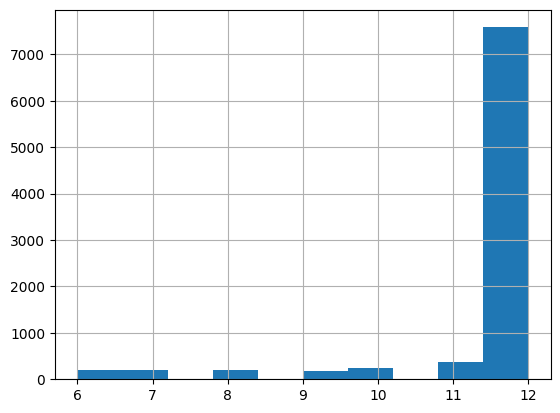

In [9]:
from collections import Counter
print(Counter(df.TENURE))
df.TENURE.hist();

Finding columns correlate with each other and whether individual correlations are problematic for the analysis.


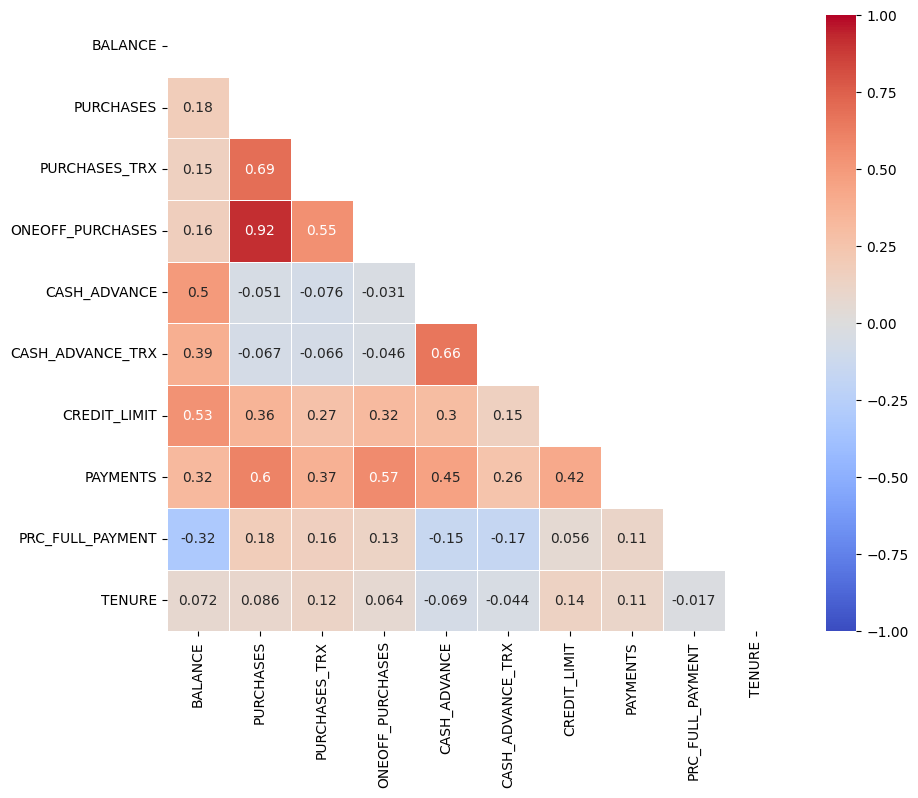

In [10]:
fig, ax = plt.subplots(figsize = [10,8])
corr    = df.drop('CUST_ID', axis = 1).corr()
matrix  = np.triu(corr)
#-----------------------------
sns.heatmap(data      = corr,
            vmin      = -1, 
            vmax      = +1, 
            cmap      = 'coolwarm',
            linewidth = 0.5, 
            linecolor = 'white',
            annot = True, 
            mask = matrix);

#### Data preparation, modeling and interpretation
preparation of the data for modeling and putting all numeric variables on the same scale 


In [11]:
scaler     = StandardScaler()
arr_df_std = scaler.fit_transform(df.iloc[:,1:]) 
# ----------------------------------------------------------------
print('arr_df_std shape is', arr_df_std.shape, '\n')
display(pd.DataFrame(arr_df_std, columns = df.columns[1:]).head())
print('\n')
display(df.iloc[:,1:].head())

arr_df_std shape is (8949, 10) 



,BALANCE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.424934,-0.511381,-0.356957,-0.466805,-0.476083,-0.960380,-0.529026,-0.525588,0.360541
1,0.786858,-0.469584,-0.591841,-0.356957,2.605438,0.110032,0.688601,0.818546,0.234159,0.360541
2,0.447041,-0.107716,-0.109082,0.108843,-0.466805,-0.476083,0.826016,-0.383857,-0.525588,0.360541
3,0.049015,0.231995,-0.551611,0.546123,-0.368678,-0.329554,0.826016,-0.598733,-0.525588,0.360541
4,-0.358849,-0.462095,-0.551611,-0.347317,-0.466805,-0.476083,-0.905414,-0.364421,-0.525588,0.360541


,BALANCE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,2,0.00,0.000000,0,1000.0,201.802084,0.000000,12
1,3202.467416,0.00,0,0.00,6442.945483,4,7000.0,4103.032597,0.222222,12
2,2495.148862,773.17,12,773.17,0.000000,0,7500.0,622.066742,0.000000,12
3,1666.670542,1499.00,1,1499.00,205.788017,1,7500.0,0.000000,0.000000,12
4,817.714335,16.00,1,16.00,0.000000,0,1200.0,678.334763,0.000000,12


Finding the *within-cluster sum of squares* (WCSS) for a cluster selection of one to ten clusters.


In [12]:
cluster_scores = []
for k in range(1,11):
    model = KMeans(n_clusters = k, n_init = 50, random_state = 0)
    model.fit(arr_df_std)
    cluster_scores.append(model.score(arr_df_std))

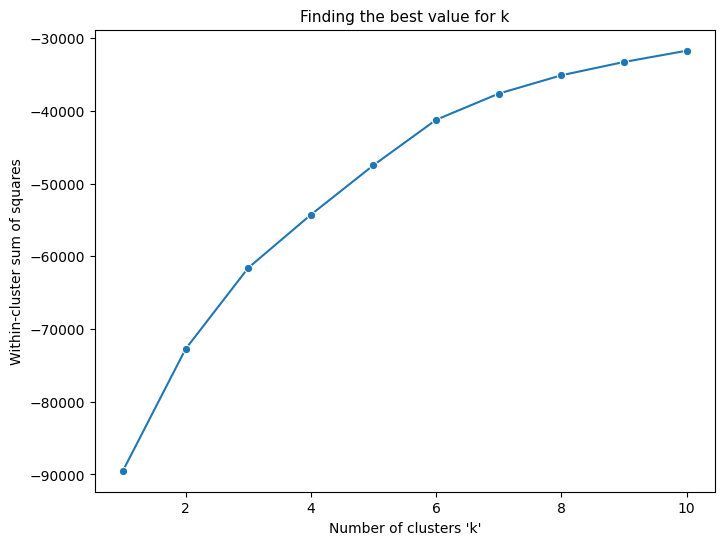

In [13]:
# Plot WCSS 
fig, ax = plt.subplots(figsize = [8,6])

sns.lineplot(y = cluster_scores, 
             x = range(1,11), marker = 'o')

ax.set_title("Finding the best value for k", fontsize = '11')
ax.set_xlabel("Number of clusters 'k'", fontsize = '10')
ax.set_ylabel("Within-cluster sum of squares", fontsize = '10');

In [14]:
# Silhouette coefficients for clusters from 4 to 6

sil_scores = []
for k in range(4,7):
    model = KMeans(n_clusters = k, n_init = 50, random_state = 0)
    model.fit(arr_df_std)
    sil_scores.append(silhouette_score(arr_df_std, model.labels_))
    print(f'Silhouette score for {k} clusters is {round(silhouette_score(arr_df_std, model.labels_),4)}')

Silhouette score for 4 clusters is 0.3141
Silhouette score for 5 clusters is 0.3827
Silhouette score for 6 clusters is 0.3517


Silhouette coefficients for each sample for 4 to 6 clusters

Visualization of Silhouette Scores for KMeans Clustering with Varying Number of Cluster

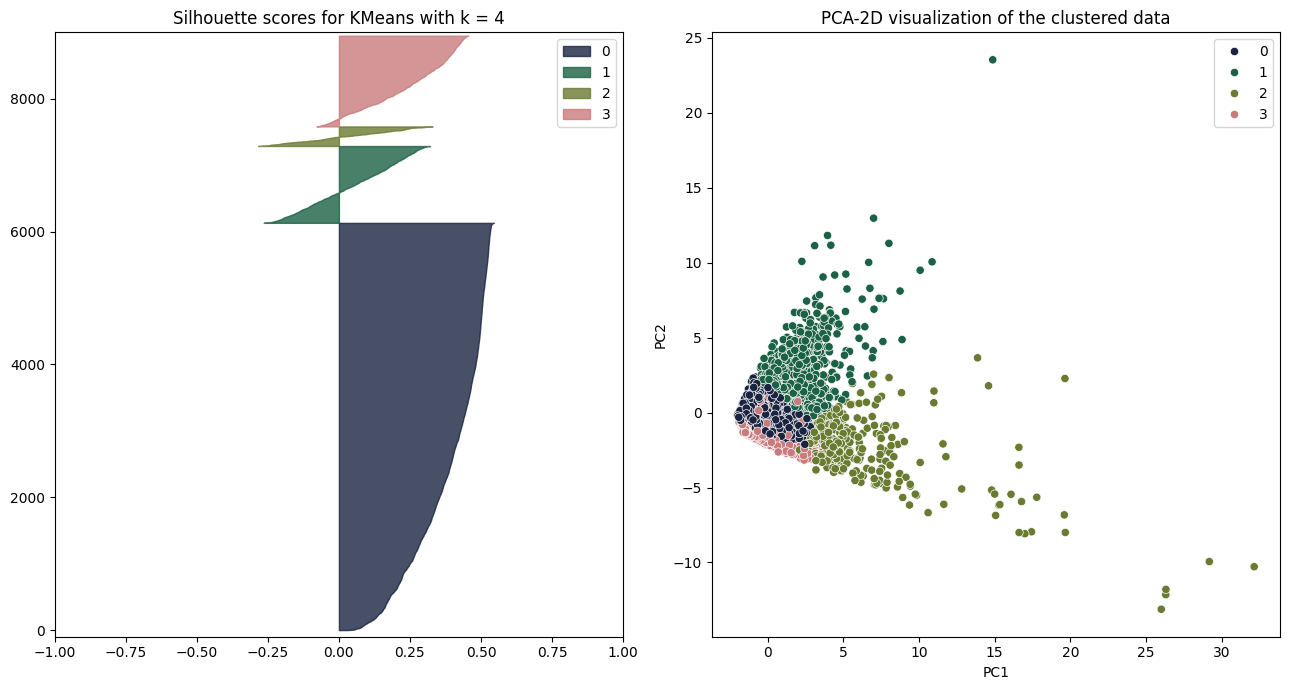

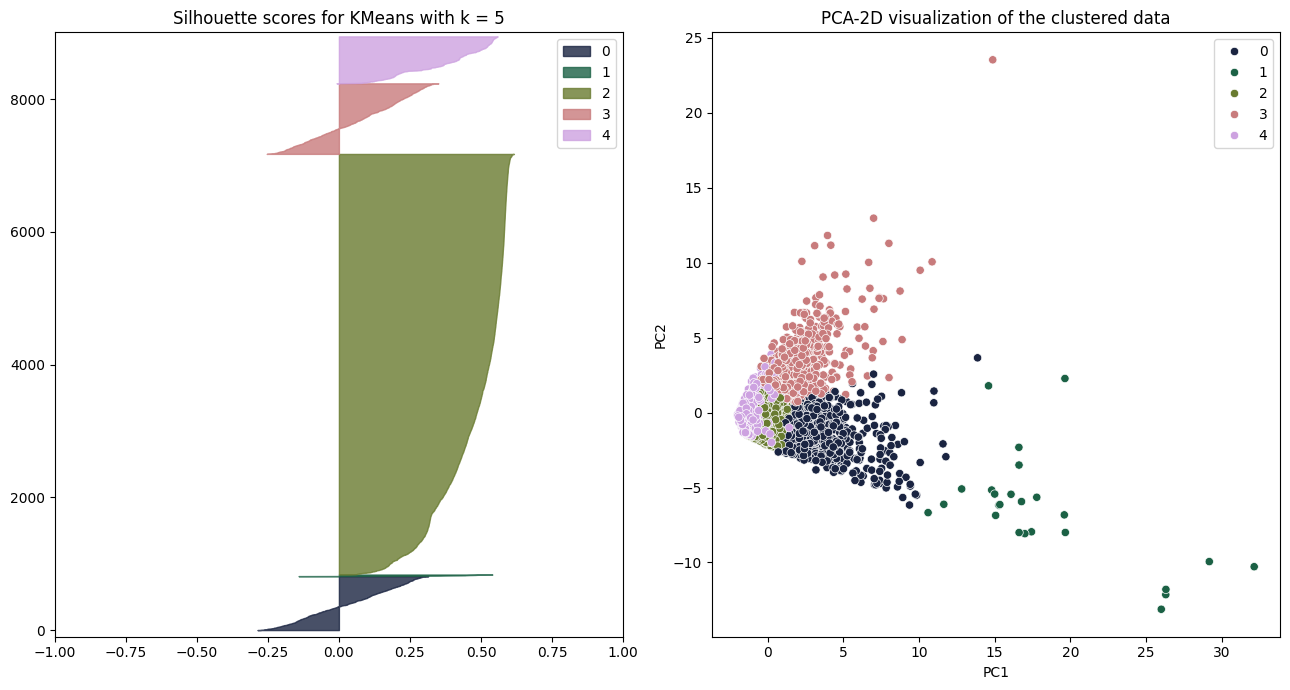

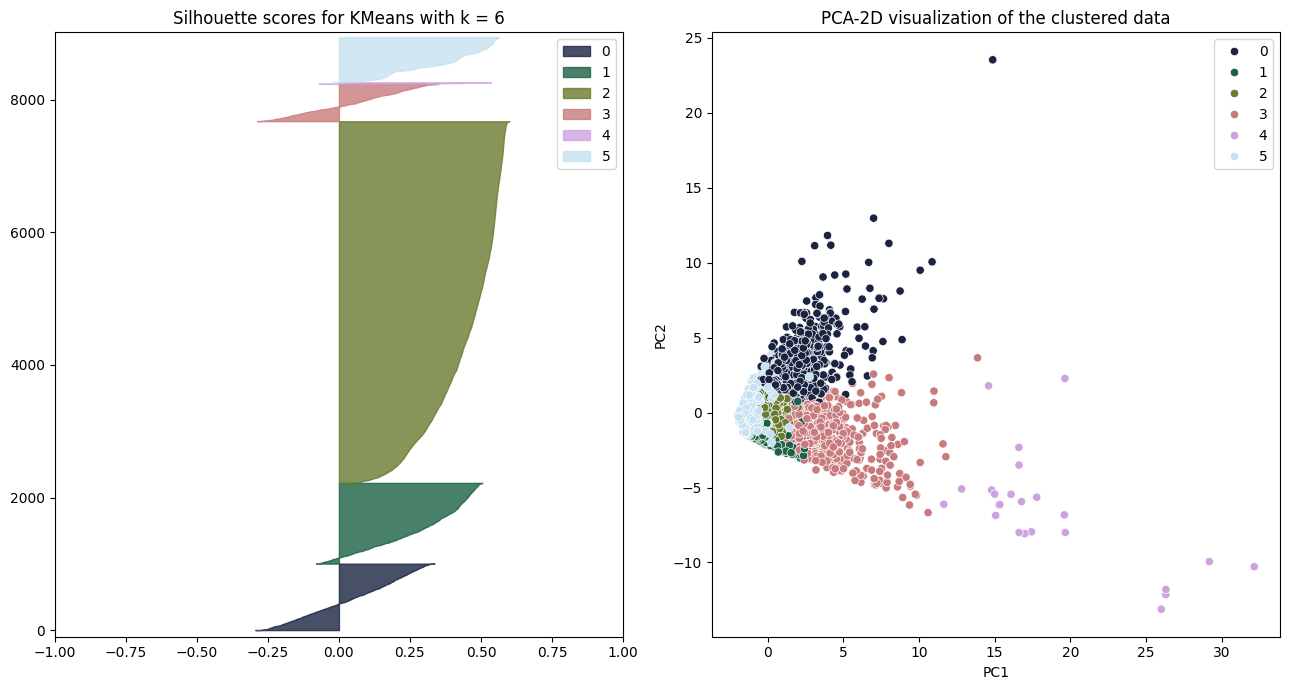

In [15]:
max_clusters = 6 
custom_palette = sns.color_palette("cubehelix", max_clusters)

for n_cluster in range(4, 7):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[13, 7])
    model = KMeans(n_clusters = n_cluster, n_init = 50, random_state=0)
    model.fit(arr_df_std)
    arr_sil = silhouette_samples(arr_df_std, model.labels_)

    # PCA transformation
    pca = PCA(n_components=2, random_state = 0)
    pca.fit(arr_df_std)
    df_pca = pd.DataFrame(pca.transform(arr_df_std), columns=['PC1', 'PC2'])

    sns.scatterplot(x       = 'PC1',
                    y       = 'PC2',
                    data    = df_pca,
                    hue     = model.labels_,
                    palette = custom_palette[:n_cluster],
                    ax      = ax2)

    start = 0
    for cluster in range(n_cluster):
        sv_sorted = np.sort(arr_sil[model.labels_ == cluster])
        sv_len    = len(sv_sorted)
        end       = start + sv_len
        
        # Fill between x with silhouette values for the cluster
        ax1.fill_betweenx(
                         y         = np.arange(start, end),
                         x1        = 0,
                         x2        = sv_sorted,
                         facecolor = custom_palette[cluster],
                         edgecolor = custom_palette[cluster],
                         alpha      = 0.8
        )
        start = end

    ax1.set_title(f"Silhouette scores for KMeans with k = {n_cluster}")
    ax2.set_title(f"PCA-2D visualization of the clustered data")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([-100, len(arr_df_std) + (n_cluster + 1) * 10])
    ax1.legend([f'{i}' for i in range(n_cluster)], loc='upper right')

    plt.tight_layout()

It is noted that two clusters exhibit numerous values closely resembling points in other clusters. Furthermore, there is a significantly large cluster comprising entirely of positive values. The number of clusters appears to exert minimal influence on the structure of the silhouette values. Hence, it is deemed suitable to proceed with five clusters.

In [16]:
# Model with best silhouette coefficient score
model = KMeans(n_clusters = 5, n_init = 50, random_state = 0)
model.fit(arr_df_std)

KMeans(n_clusters=5, n_init=50, random_state=0)

In [17]:
print(model.inertia_)

47468.2248369613


In [18]:
# New column with clusters 
df['Labels'] = model.labels_
df.head()

,CUST_ID,BALANCE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,C10001,40.900749,95.40,2,0.00,0.000000,0,1000.0,201.802084,0.000000,12,2
1,C10002,3202.467416,0.00,0,0.00,6442.945483,4,7000.0,4103.032597,0.222222,12,3
2,C10003,2495.148862,773.17,12,773.17,0.000000,0,7500.0,622.066742,0.000000,12,2
3,C10004,1666.670542,1499.00,1,1499.00,205.788017,1,7500.0,0.000000,0.000000,12,2
4,C10005,817.714335,16.00,1,16.00,0.000000,0,1200.0,678.334763,0.000000,12,2


Combination of similar points to form the clusters

In [19]:
# Groupby each cluster by Labels mean
df.iloc[:,1:].groupby('Labels').agg('mean')

,BALANCE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
Labels,,,,,,,,,,
0,2393.237896,4620.460566,63.693727,2995.404071,407.287412,1.269373,8618.450185,4427.464539,0.323249,11.942189
1,5249.640708,26813.470800,130.240000,21506.773200,1488.363253,2.400000,15560.000000,27384.597243,0.527424,11.920000
2,956.678986,575.680976,9.989588,284.281079,400.645911,1.695851,3509.389533,1030.118950,0.147799,11.893832
3,4967.234495,565.752829,8.582707,332.548496,4837.701096,14.143797,8298.829460,4013.450602,0.036662,11.682331
4,812.941077,424.730692,5.872881,245.045579,996.281721,3.086158,2470.414313,603.459564,0.174934,7.403955


In [20]:
# Another method to retain the same info ---> scaler.inverse_transform(model.cluster_centers_)
# ========================
pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df.columns[1:-1])

,BALANCE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2393.237896,4620.460566,63.693727,2995.404071,407.287412,1.269373,8618.450185,4427.464539,0.323249,11.942189
1,5249.640708,26813.470800,130.240000,21506.773200,1488.363253,2.400000,15560.000000,27384.597243,0.527424,11.920000
2,956.678986,575.680976,9.989588,284.281079,400.645911,1.695851,3509.389533,1030.118950,0.147799,11.893832
3,4967.234495,565.752829,8.582707,332.548496,4837.701096,14.143797,8298.829460,4013.450602,0.036662,11.682331
4,812.941077,424.730692,5.872881,245.045579,996.281721,3.086158,2470.414313,603.459564,0.174934,7.403955


Plotting the heatmap for better visual 

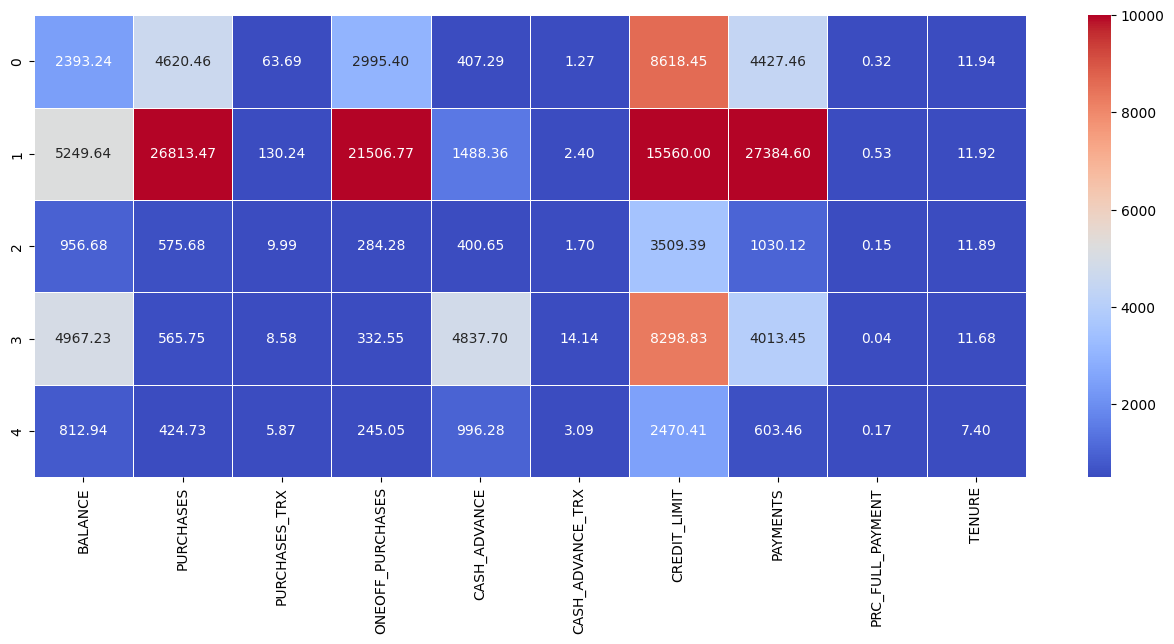

In [21]:
fig, ax = plt.subplots(figsize = [16,6])
# --------------------------------------
clusters_df = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df.columns[1:-1])
sns.heatmap(clusters_df, 
            cmap      = 'coolwarm', 
            vmin      = 500, 
            vmax      = 10000,
            annot     = True, 
            fmt       = '.2f', 
            linewidth = 0.5, 
            linecolor = 'white');

### Summary of Cluster Names:
Cluster 0: " High Spenders" -->
Description: High balances with frequent and substantial purchases. Significant one-off purchases, high credit limits, and high payment amounts. Moderate likelihood of full payments.

Cluster 1: "Premium Customers" -->
Description: Extremely high balances and spending. Make numerous high-value purchases, both regular and one-off. Highest credit limits and payments, with a high percentage of fully paid balances.

Cluster 2: "Moderate Spenders" -->
Description: Moderate balances and spending. Regular purchase activities with occasional cash advances. Moderate credit limits and a balanced approach to payments and full payments.

Cluster 3: "Cash Advance Dependent" -->
Description: High balances with significant reliance on cash advances. Moderate one-off purchases and high credit limits, but low percentage of full payments.

Cluster 4: "Occasional Spenders" -->
Description: Low activity across the board. Low balances, purchases, and credit limits. They make some cash advances and have a high tendency to fully pay off their balances.

In [22]:
cluster_mapping = { 0: 'High Spenders',
                    1: 'Premium Customers',
                    2: 'Moderate Spenders',
                    3: 'Cash Advance Dependent',
                    4: 'Occasional Spenders'
                  }

df['CLUSTER_NAME'] = df['Labels'].map(cluster_mapping)
#df.drop(labels = 'Labels', axis = 1, inplace = True)
df.head()

,CUST_ID,BALANCE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels,CLUSTER_NAME
0,C10001,40.900749,95.40,2,0.00,0.000000,0,1000.0,201.802084,0.000000,12,2,Moderate Spenders
1,C10002,3202.467416,0.00,0,0.00,6442.945483,4,7000.0,4103.032597,0.222222,12,3,Cash Advance Dependent
2,C10003,2495.148862,773.17,12,773.17,0.000000,0,7500.0,622.066742,0.000000,12,2,Moderate Spenders
3,C10004,1666.670542,1499.00,1,1499.00,205.788017,1,7500.0,0.000000,0.000000,12,2,Moderate Spenders
4,C10005,817.714335,16.00,1,16.00,0.000000,0,1200.0,678.334763,0.000000,12,2,Moderate Spenders


Exploring Credit Card Customer Segmentation: Heatmap Analysis

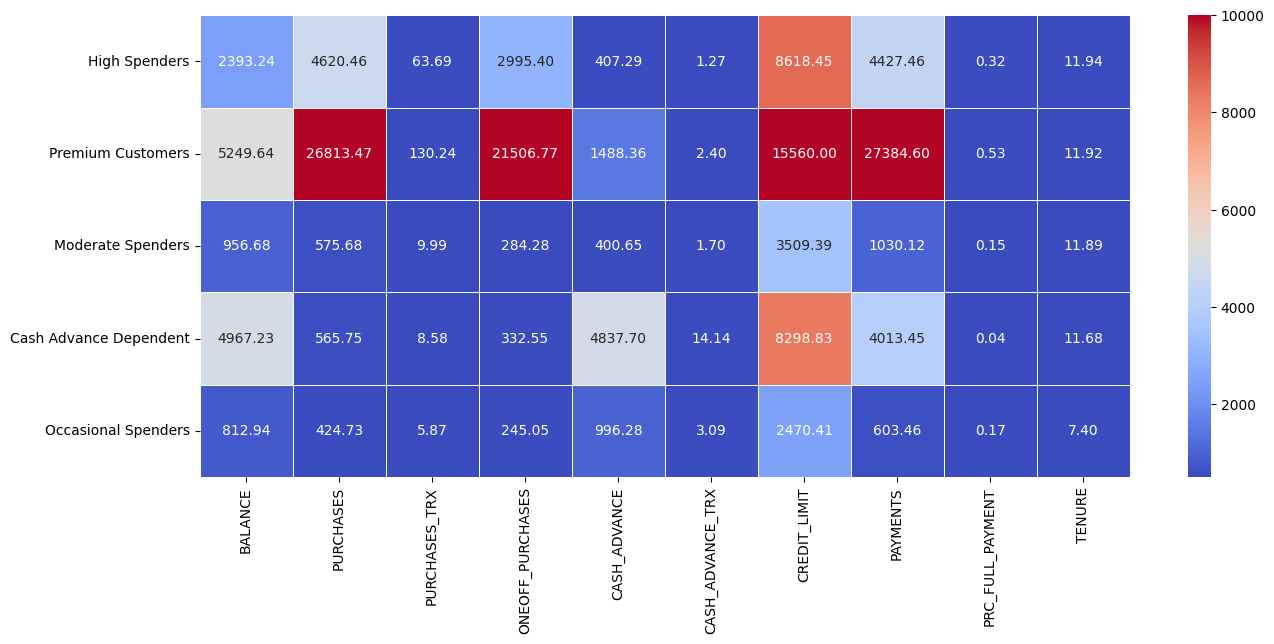

In [23]:
clusters_df = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df.columns[1:-2])
clusters_df.index = clusters_df.index.map(cluster_mapping)
#------------------------------------------------------------------------------------------------------
fig, ax     = plt.subplots(figsize = [15,6])
sns.heatmap(clusters_df, 
            cmap      = 'coolwarm', 
            vmin      = 500, 
            vmax      = 10000,
            annot     = True, 
            fmt       = '.2f', 
            linewidth = 0.5, 
            linecolor = 'white');

In [24]:
Counter(df['CLUSTER_NAME'])

Counter({'Moderate Spenders': 6339,
         'Cash Advance Dependent': 1064,
         'High Spenders': 813,
         'Occasional Spenders': 708,
         'Premium Customers': 25})

In conclusion, based on  analysis, Group 4, consisting of 25 individuals categorized as "Premium Customers," should receive improved conditions. These customers demonstrate a high frequency of purchases and consistently meet their payment obligations. Therefore, offering enhanced terms and conditions tailored to their spending habits could further incentivize their loyalty and satisfaction.

In [25]:
pca = PCA(n_components=2, random_state= 0)
pca.fit(arr_df_std)
print(pca.explained_variance_ratio_)
pd.DataFrame(pca.components_, columns =df.columns[1:-2])

[0.33631105 0.23031697]


,BALANCE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.286833,0.461514,0.361967,0.435999,0.193615,0.133212,0.353209,0.439464,0.052253,0.088139
1,0.388247,-0.285359,-0.261057,-0.258514,0.523017,0.487332,0.144181,0.070696,-0.305297,-0.053133


Exploring Credit Card Customer Segmentation: A 2D Visualization

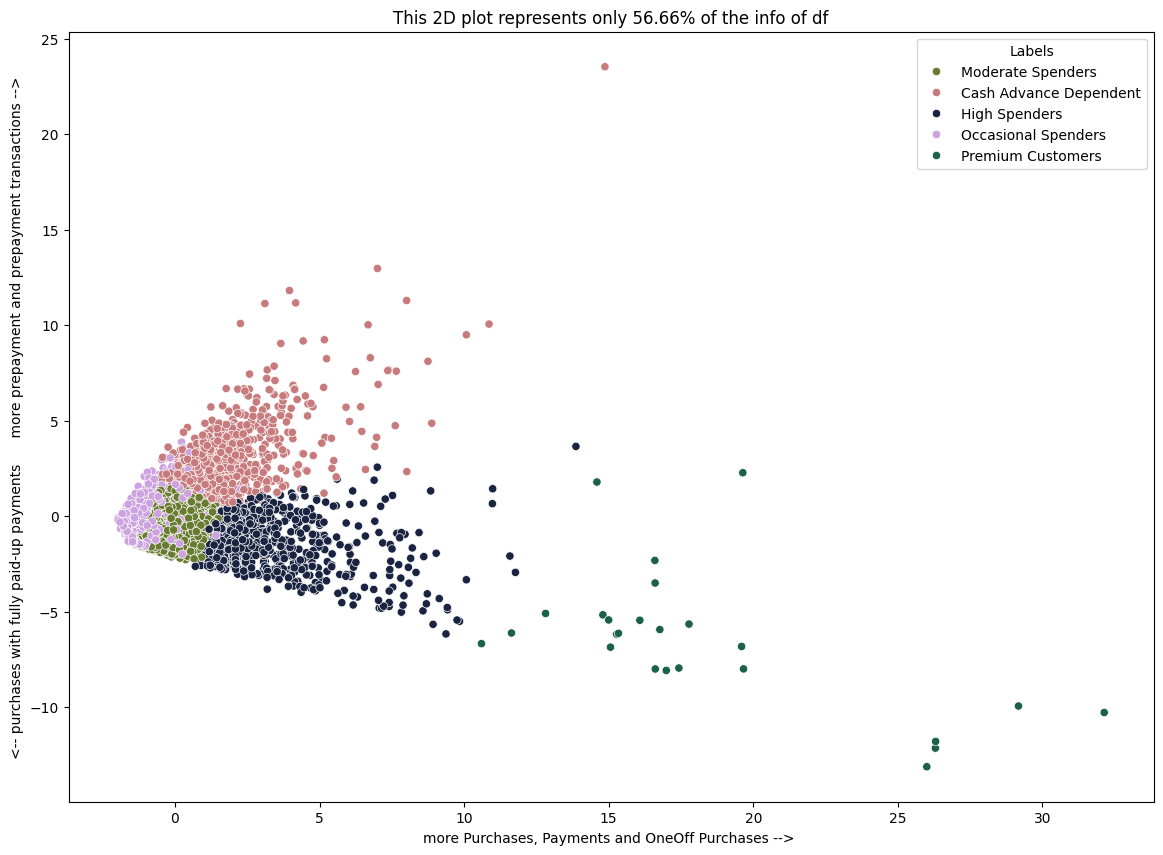

In [26]:
name_to_color = {name: custom_palette[idx] for idx, name in cluster_mapping.items()}

df_pca = pd.DataFrame(pca.transform(arr_df_std), columns = ['PC1', 'PC2'])
fig, ax = plt.subplots(figsize=[14,10])
sns.scatterplot(x       = 'PC1', 
                y       = 'PC2', 
                data    = df_pca, 
                palette = name_to_color,
                hue     = df['Labels'].map(cluster_mapping)
                )

plt.xlabel('more Purchases, Payments and OneOff Purchases --> ')
plt.ylabel('<-- purchases with fully paid-up payments      more prepayment and prepayment transactions -->')
plt.title(f'This 2D plot represents only {round(np.sum(pca.explained_variance_ratio_)*100,2)}% of the info of df');

Exploring Credit Card Customer Segmentation: Pairwise Relationships

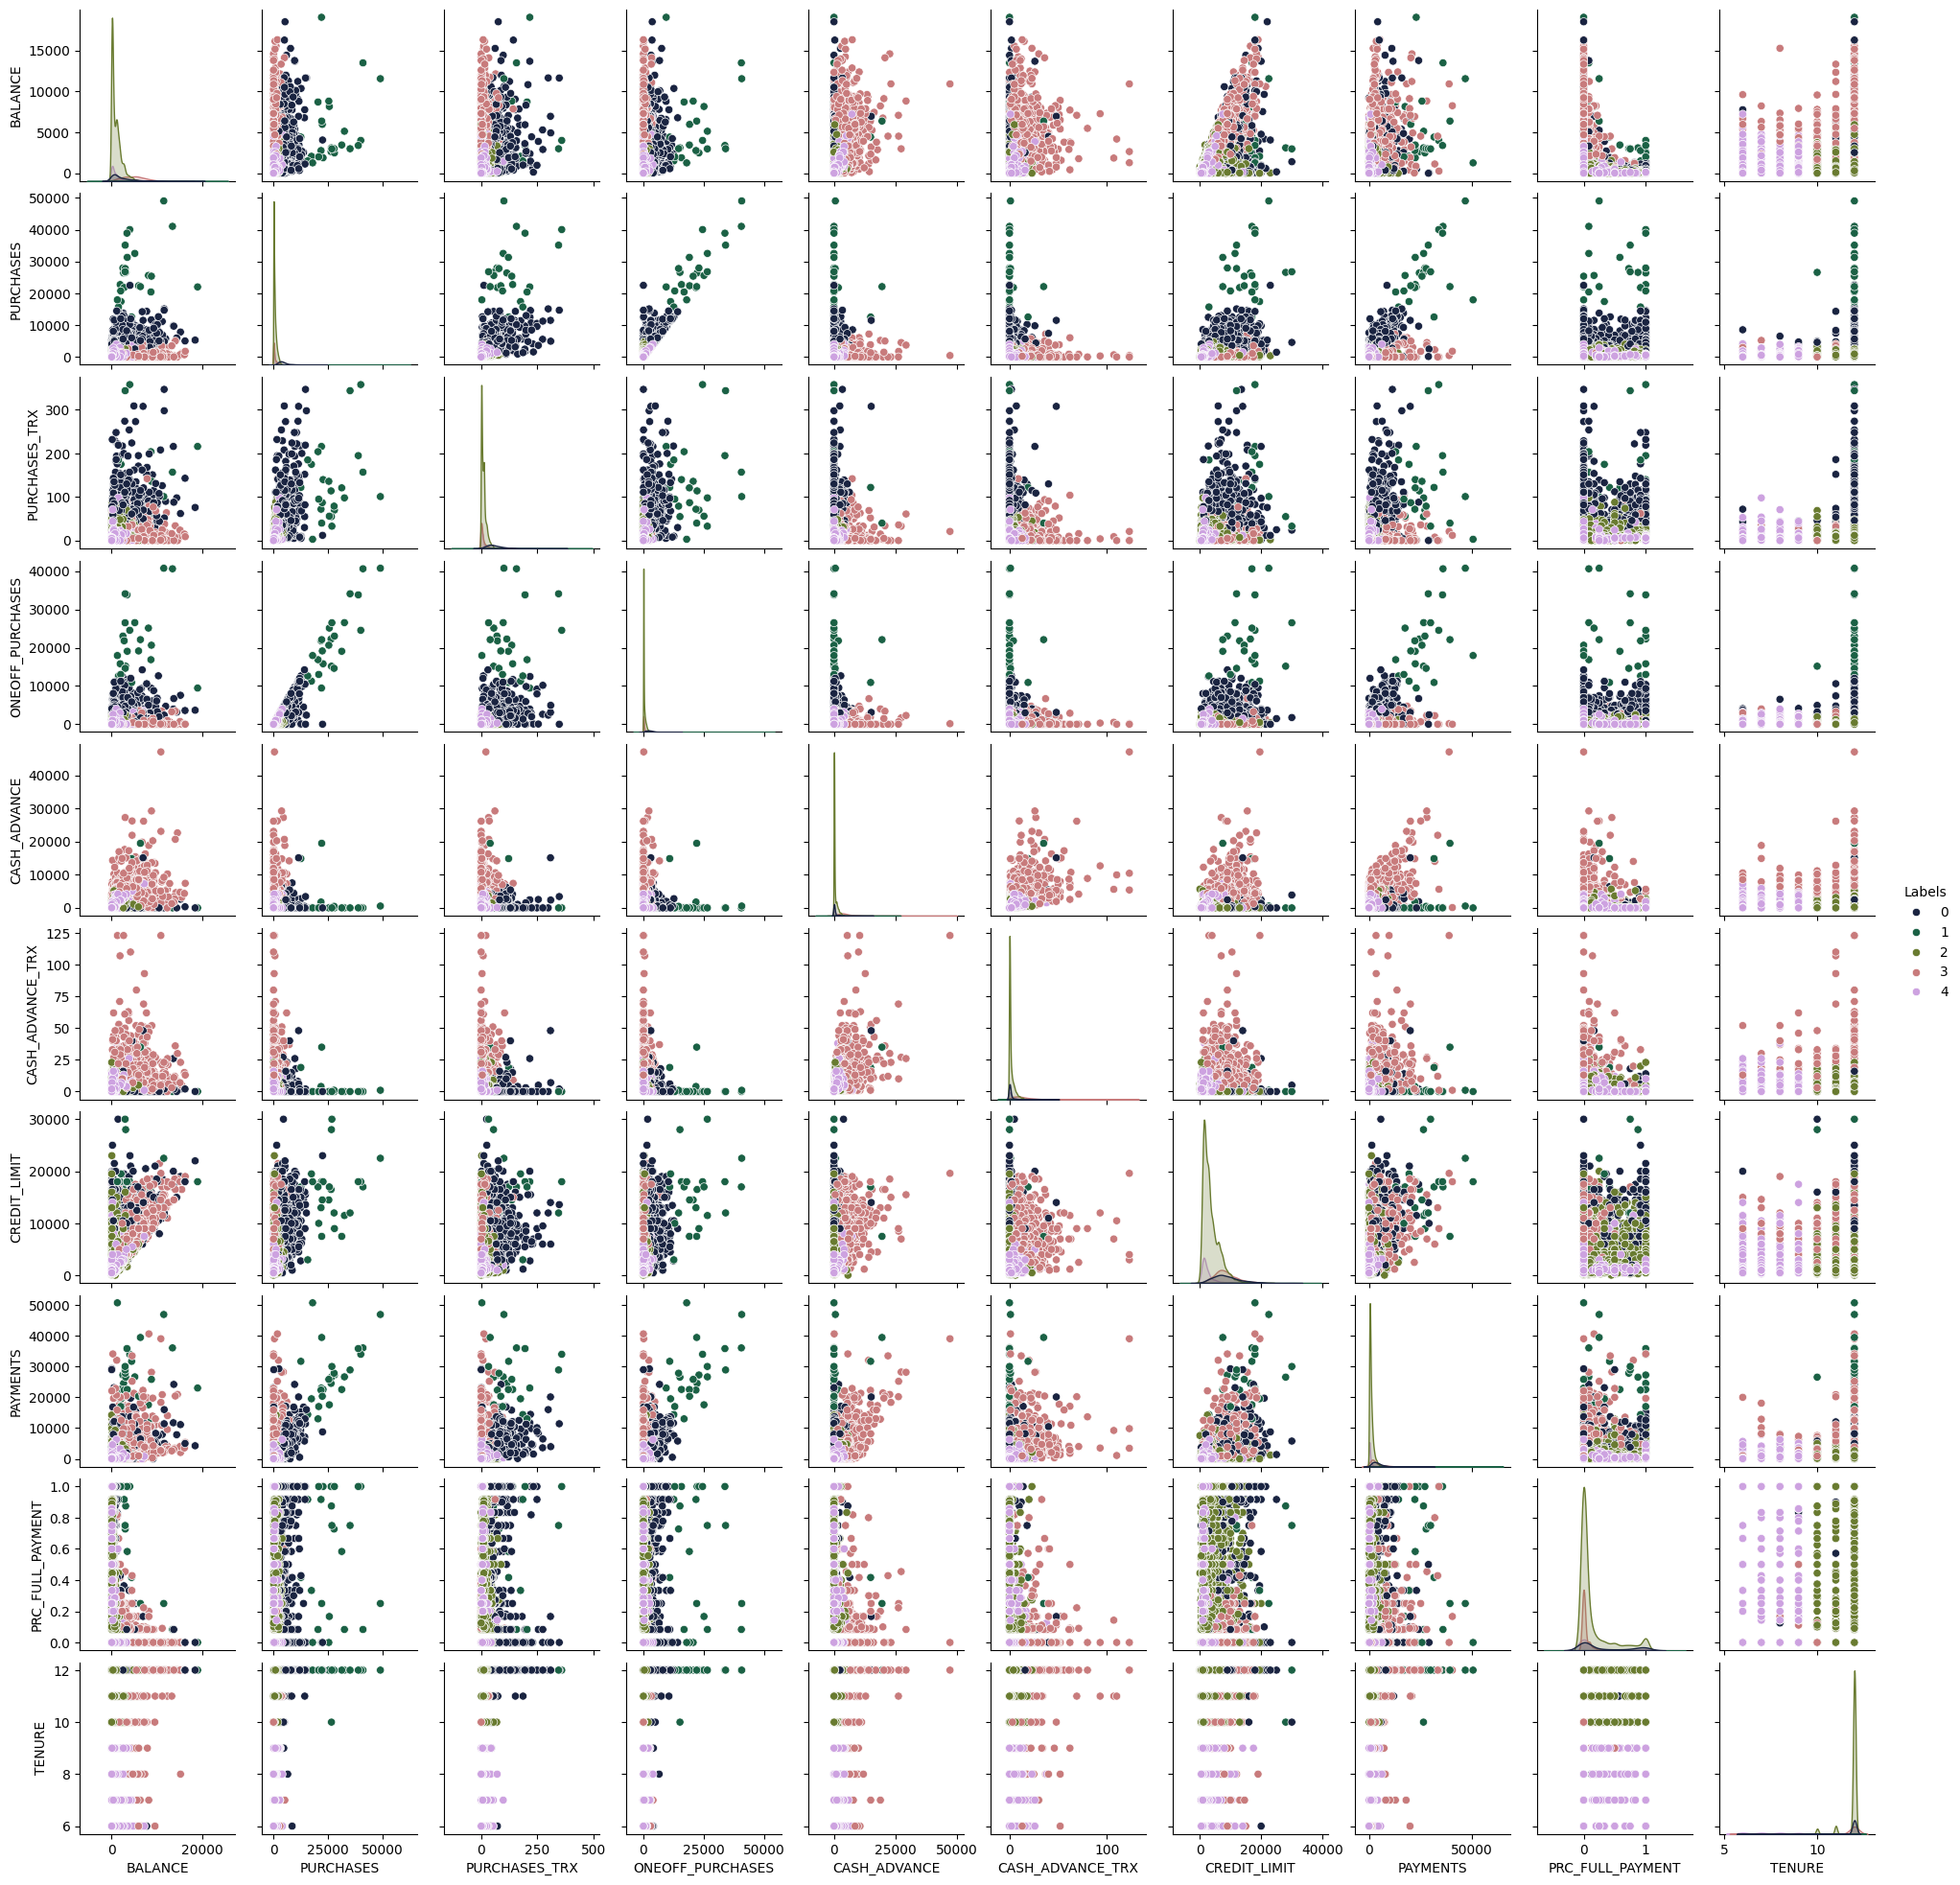

In [27]:
sns.pairplot(df[1:-1], hue = 'Labels', palette = custom_palette[:5], height = 2);